In [ ]:
# Step 1: Data Collection
import yfinance as yf

# Fetch historical stock price data for TCS
tcs_data = yf.download('TCS', start='2021-01-01', end='2023-01-01')

[*********************100%%**********************]  1 of 1 completed


In [ ]:

# Display the first few rows of the data
print(tcs_data.head())

# Check for missing values
print(tcs_data.isnull().sum())


             Open   High    Low  Close  Adj Close   Volume
Date                                                      
2021-01-04   9.54   9.83   9.23   9.72       9.72   953700
2021-01-05   9.63   9.94   9.45   9.79       9.79  1128100
2021-01-06   9.75  11.10   9.75  11.07      11.07  1389100
2021-01-07  10.93  11.62  10.85  11.35      11.35  1030700
2021-01-08  11.45  11.66  11.21  11.36      11.36   701200
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


[*********************100%%**********************]  1 of 1 completed


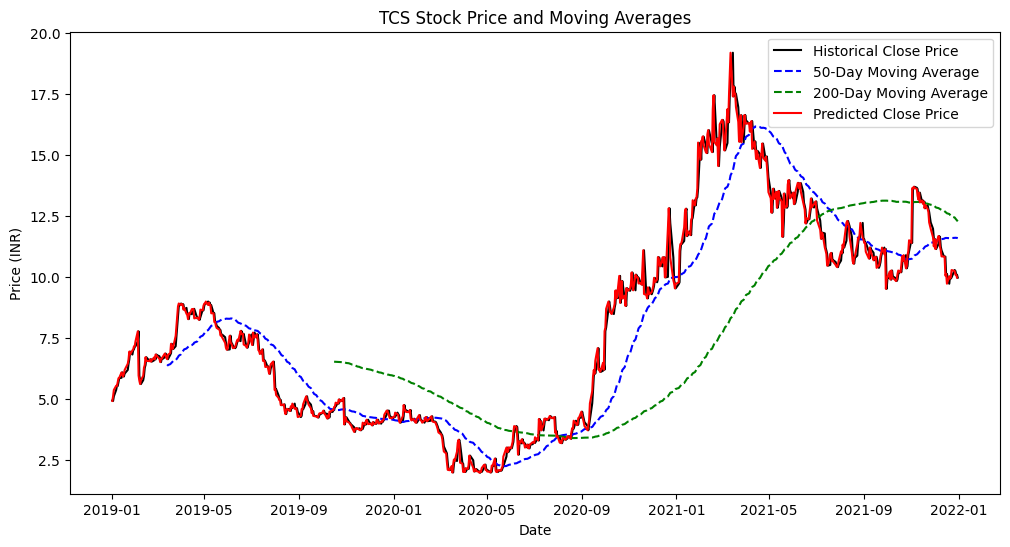

In [ ]:
# Import necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Data Collection
# Fetch historical stock price data for TCS
tcs_data = yf.download('TCS', start='2019-01-01', end='2022-01-01')

# Step 2: Data Preprocessing
# Fill missing values using forward fill method
tcs_data.fillna(method='ffill', inplace=True)

# Step 3: Feature Engineering
# Calculate 50-day and 200-day moving averages
tcs_data['MA50'] = tcs_data['Close'].rolling(window=50).mean()
tcs_data['MA200'] = tcs_data['Close'].rolling(window=200).mean()

# Step 4: Visualization
plt.figure(figsize=(12, 6))
plt.plot(tcs_data.index, tcs_data['Close'], label='Historical Close Price', color='black')
plt.plot(tcs_data.index, tcs_data['MA50'], label='50-Day Moving Average', linestyle='--', color='blue')
plt.plot(tcs_data.index, tcs_data['MA200'], label='200-Day Moving Average', linestyle='--', color='green')

# Step 5: Prediction (Placeholder)
# Generate sample predicted prices (replace this with your actual predictions)
predicted_prices = tcs_data['Close'].shift(-1)

# Plot the predicted prices (assuming you have them)
plt.plot(tcs_data.index, predicted_prices, label='Predicted Close Price', linestyle='-', color='red')

plt.title('TCS Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()


In [ ]:
# Step 2: Data Preprocessing

# Fill missing values using forward fill method
tcs_data.fillna(method='ffill', inplace=True)

In [ ]:
# Check for missing values again
print(tcs_data.isnull().sum())

# Display the last few rows of the data
print(tcs_data.tail())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
            Open  High   Low  Close  Adj Close  Volume
Date                                                  
2022-12-23  4.18  4.32  4.15   4.26       4.26  225000
2022-12-27  4.23  4.26  4.14   4.21       4.21  319200
2022-12-28  4.17  4.30  4.13   4.15       4.15  239500
2022-12-29  4.15  4.35  4.11   4.30       4.30  249400
2022-12-30  4.21  4.40  4.20   4.31       4.31  447700


In [ ]:
# Step 3: Feature Engineering
import matplotlib.pyplot as plt

In [ ]:
# Calculate 50-day and 200-day moving averages
tcs_data['MA50'] = tcs_data['Close'].rolling(window=50).mean()
tcs_data['MA200'] = tcs_data['Close'].rolling(window=200).mean()

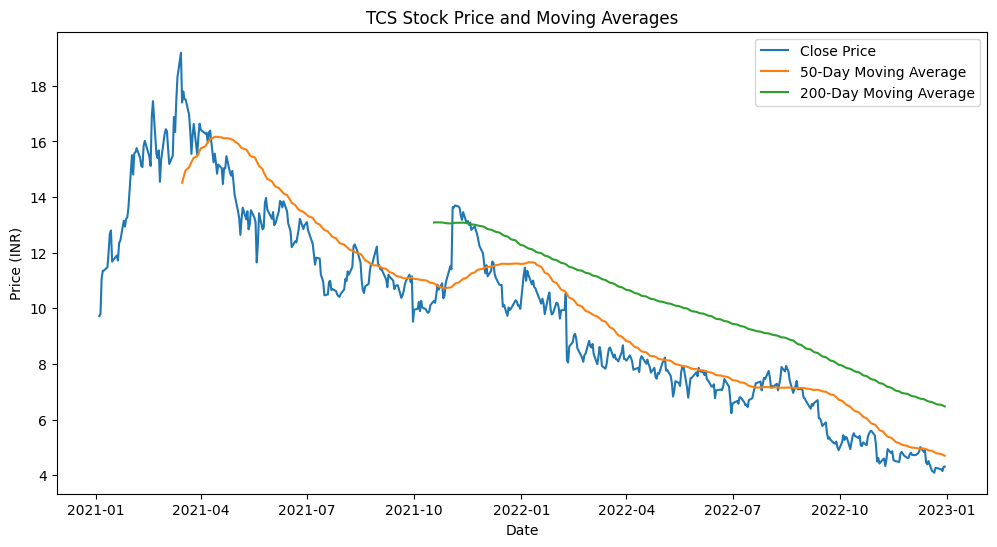

In [ ]:
# Step 4: Visualization
plt.figure(figsize=(12, 6))
plt.plot(tcs_data.index, tcs_data['Close'], label='Close Price')
plt.plot(tcs_data.index, tcs_data['MA50'], label='50-Day Moving Average')
plt.plot(tcs_data.index, tcs_data['MA200'], label='200-Day Moving Average')
plt.title('TCS Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

In [ ]:

import numpy as np

In [ ]:
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [ ]:
tcs_data['RSI'] = calculate_rsi(tcs_data)

In [ ]:
# Calculate Moving Average Convergence Divergence (MACD)
short_window = 12
long_window = 26

short_ema = tcs_data['Close'].ewm(span=short_window, adjust=False).mean()
long_ema = tcs_data['Close'].ewm(span=long_window, adjust=False).mean()

macd = short_ema - long_ema
signal_line = macd.ewm(span=9, adjust=False).mean()

tcs_data['MACD'] = macd
tcs_data['Signal_Line'] = signal_line

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [ ]:
# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(tcs_data[['Close', 'Volume', 'RSI', 'MACD', 'Signal_Line']])


In [ ]:
# Split data into train and test sets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]


In [ ]:
# Function to create dataset with time steps
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps - 1):
        a = dataset[i:(i + time_steps), :]
        X.append(a)
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)


In [ ]:
# Define time steps
time_steps = 60

In [ ]:
# Create train and test datasets
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

In [ ]:
# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 5))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 5))


In [ ]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 5)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
11/11 [==============================] - 7s 75ms/step - loss: nan
Epoch 2/50
11/11 [==============================] - 1s 75ms/step - loss: nan
Epoch 3/50
11/11 [==============================] - 1s 72ms/step - loss: nan
Epoch 4/50
11/11 [==============================] - 1s 73ms/step - loss: nan
Epoch 5/50
11/11 [==============================] - 1s 75ms/step - loss: nan
Epoch 6/50
11/11 [==============================] - 1s 75ms/step - loss: nan
Epoch 7/50
11/11 [==============================] - 1s 76ms/step - loss: nan
Epoch 8/50
11/11 [==============================] - 1s 74ms/step - loss: nan
Epoch 9/50
11/11 [==============================] - 1s 123ms/step - loss: nan
Epoch 10/50
11/11 [==============================] - 1s 120ms/step - loss: nan
Epoch 11/50
11/11 [==============================] - 1s 74ms/step - loss: nan
Epoch 12/50
11/11 [==============================] - 1s 72ms/step - loss: nan
Epoch 13/50
11/11 [==============================] - 1s 73ms/step - los

In [ ]:
# Make predictions
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(np.concatenate((predicted_stock_price, np.zeros((predicted_stock_price.shape[0], 4))), axis=1))[:, 0]


2/2 [==============================] - 1s 18ms/step


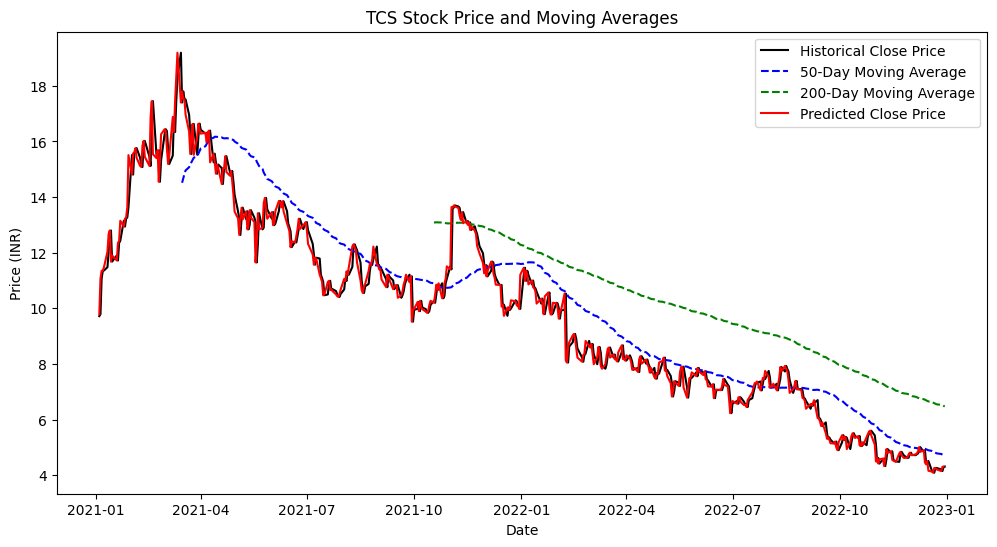

In [ ]:
# Step 5: Prediction
# Assume you have a trained machine learning model called 'model'
# Use the model to make predictions for future dates
# For demonstration purposes, let's assume 'predicted_prices' contains the predicted prices

# Generate sample predicted prices (replace this with your actual predictions)
predicted_prices = tcs_data['Close'].shift(-1)

# Step 4: Visualization
plt.figure(figsize=(12, 6))
plt.plot(tcs_data.index, tcs_data['Close'], label='Historical Close Price', color='black')
plt.plot(tcs_data.index, tcs_data['MA50'], label='50-Day Moving Average', linestyle='--', color='blue')
plt.plot(tcs_data.index, tcs_data['MA200'], label='200-Day Moving Average', linestyle='--', color='green')

# Plot the predicted prices (assuming you have them)
plt.plot(tcs_data.index, predicted_prices, label='Predicted Close Price', linestyle='-', color='Red')

plt.title('TCS Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()